# Reefetuar as análises com a normalização por log

## Definição de pronto

### Dados preparados no ambiente

## Definição de entregue

### Notebook fazendo a avaliação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as sklpp

pd.set_option("display.precision", 4)

df_wine = pd.read_parquet("../../Data/Processed/wine/df_wine.parquet") 

In [2]:
# Criando dataframe normalizado

# Referência: https://scikit-learn.org/stable/modules/preprocessing.html
#             https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
#             https://scikit-learn.org/stable/modules/preprocessing.html

# Usando FunctionTransformer para usar função log1p de numpy para normalizar cada coluna
# Usar log dá erro de divisão por zero

function_transformer = sklpp.FunctionTransformer

transformer = function_transformer(np.log1p, validate=True)

df_wine_normalizado = pd.DataFrame(transformer.transform(df_wine))

# scikit learn retira as colunas do dataframe modificado. Colocando-as de volta
df_wine_normalizado.columns = df_wine.columns

# visualização da normalização
df_wine_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,2.1282,0.5306,0.0000,1.0647,0.0733,2.4849,3.5553,0.6920,1.5063,0.4447,2.3418,1.7918,0.6931
1,2.1748,0.6313,0.0000,1.2809,0.0935,3.2581,4.2195,0.6915,1.4351,0.5188,2.3795,1.7918,0.6931
2,2.1748,0.5653,0.0392,1.1939,0.0880,2.7726,4.0073,0.6916,1.4493,0.5008,2.3795,1.7918,0.6931
3,2.5014,0.2469,0.4447,1.0647,0.0723,2.8904,4.1109,0.6921,1.4255,0.4574,2.3795,1.9459,0.6931
4,2.1282,0.5306,0.0000,1.0647,0.0733,2.4849,3.5553,0.6920,1.5063,0.4447,2.3418,1.7918,0.6931


## Refazendo as análises

In [3]:
# Estatísticas Gerais

df_wine_normalizado.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000
mean,2.0949,0.2855,0.2706,1.6207,0.0540,3.2672,4.5783,0.6905,1.4388,0.4217,2.4364,1.9113,0.1706
std,0.1450,0.1148,0.1099,0.6821,0.0308,0.6555,0.6991,0.0015,0.0379,0.0916,0.1017,0.1295,0.2986
min,1.5686,0.0770,0.0000,0.4700,0.0090,0.6931,1.9459,0.6867,1.3137,0.1989,2.1972,1.3863,0.0000
25%,2.0015,0.2070,0.2231,1.0296,0.0373,2.8904,4.3567,0.6893,1.4134,0.3577,2.3514,1.7918,0.0000
50%,2.0794,0.2546,0.2700,1.3863,0.0459,3.4012,4.7791,0.6906,1.4375,0.4121,2.4248,1.9459,0.0000
75%,2.1633,0.3365,0.3293,2.2083,0.0630,3.7377,5.0562,0.6916,1.4633,0.4700,2.5096,1.9459,0.0000
max,2.8273,0.9478,0.9783,4.2017,0.4769,5.6699,6.0890,0.7124,1.6114,1.0986,2.7663,2.3026,0.6931


In [4]:
# Avaliar a faixa dimâmica por variável

for (column, _ ) in df_wine_normalizado.items():
    print(f'{column} \t faixa dinâmica: \t {"{:.2f}".format(df_wine_normalizado[column].max() - df_wine_normalizado[column].min())}')

fixed acidity 	 faixa dinâmica: 	 1.26
volatile acidity 	 faixa dinâmica: 	 0.87
citric acid 	 faixa dinâmica: 	 0.98
residual sugar 	 faixa dinâmica: 	 3.73
chlorides 	 faixa dinâmica: 	 0.47
free sulfur dioxide 	 faixa dinâmica: 	 4.98
total sulfur dioxide 	 faixa dinâmica: 	 4.14
density 	 faixa dinâmica: 	 0.03
pH 	 faixa dinâmica: 	 0.30
sulphates 	 faixa dinâmica: 	 0.90
alcohol 	 faixa dinâmica: 	 0.57
quality 	 faixa dinâmica: 	 0.92
type 	 faixa dinâmica: 	 0.69


**Podemos observar uma boa redução na diferença das faixas dinâmicas das variáveis em relação aos dados não normalizados. Por exemplo, a variável total sulfur dioxide que apresentava, dependendo da variável de comparação, até 4 ordens de grandeza de diferença, após a normalização apresenta no máximo 2.**

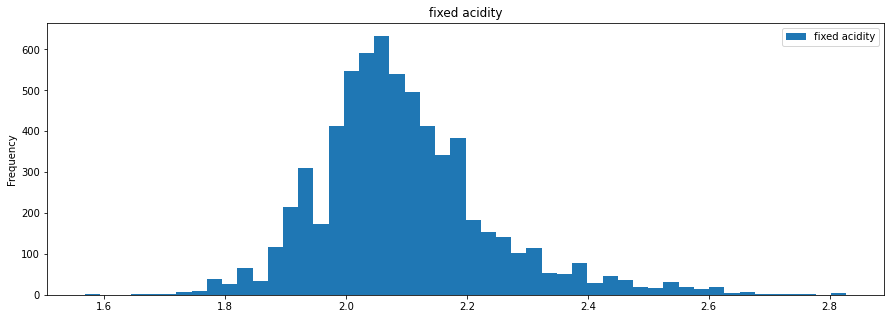

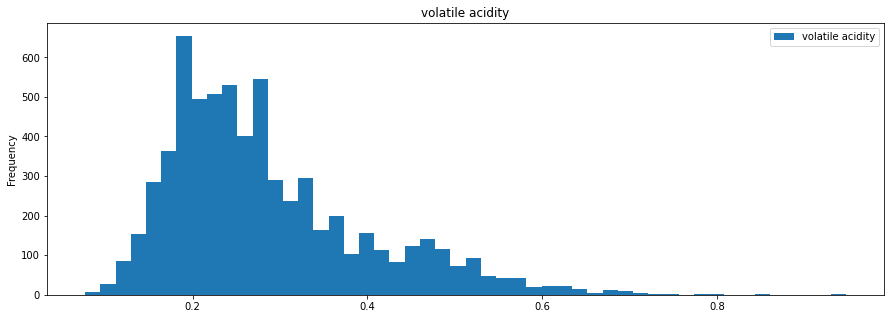

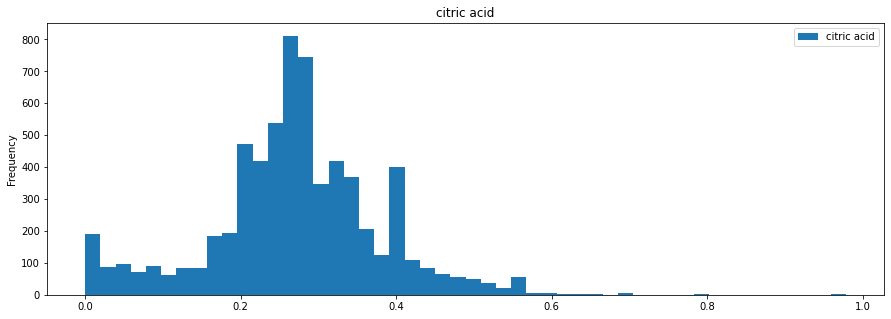

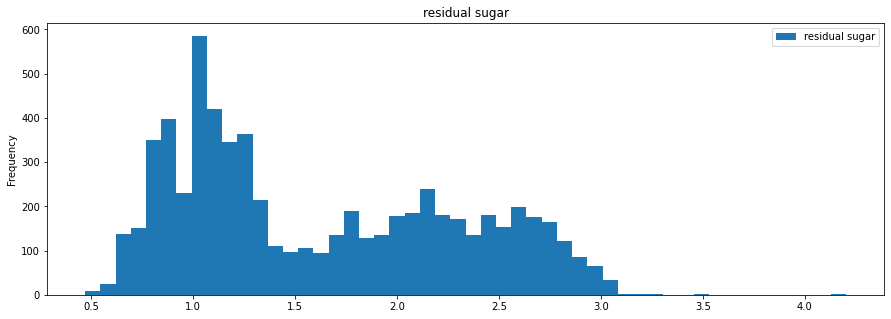

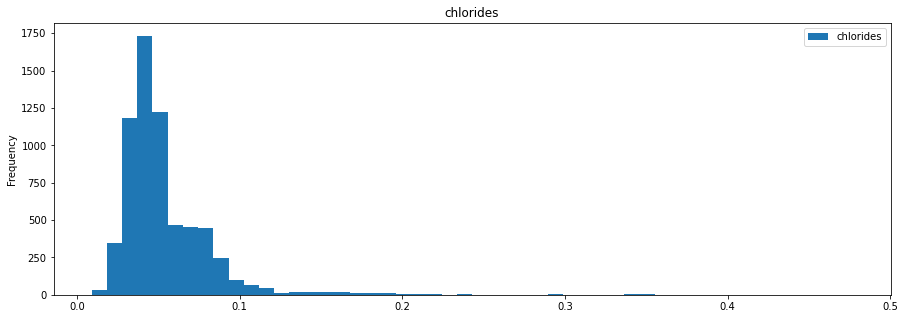

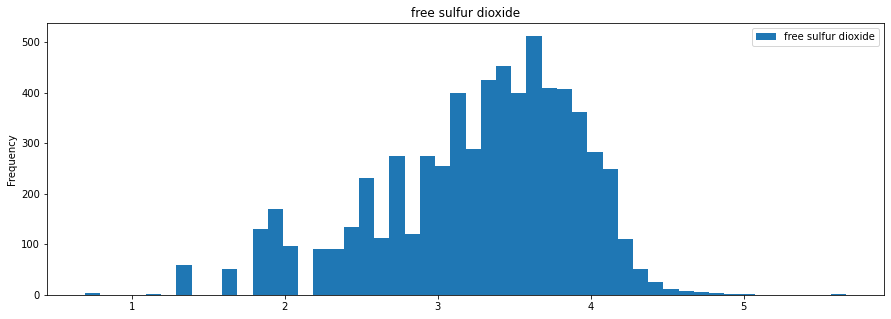

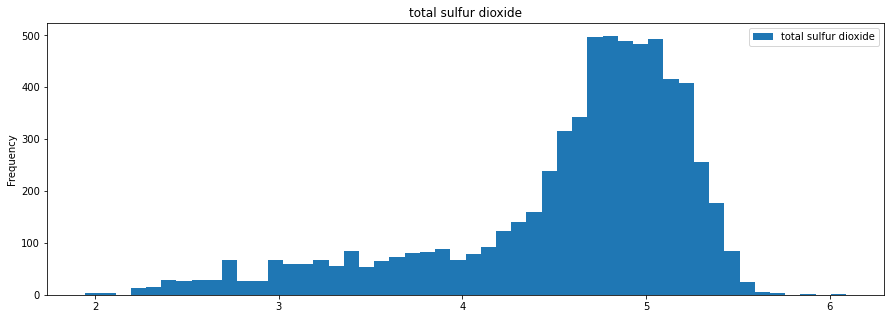

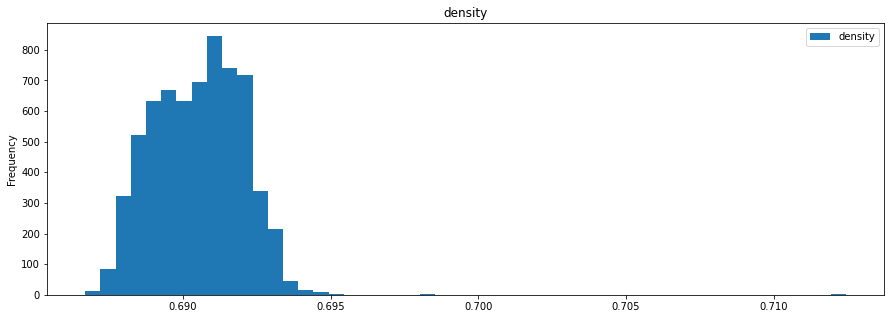

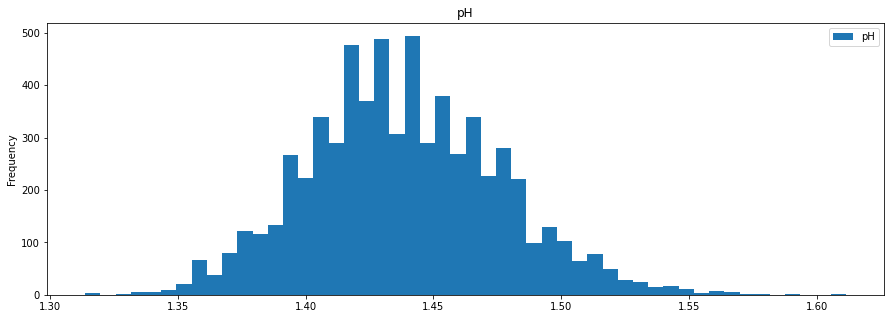

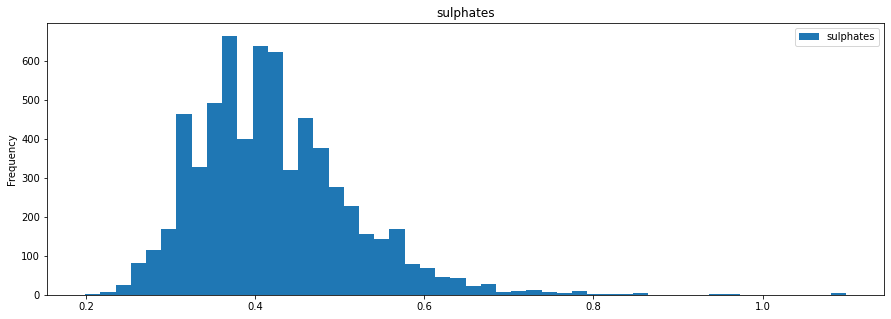

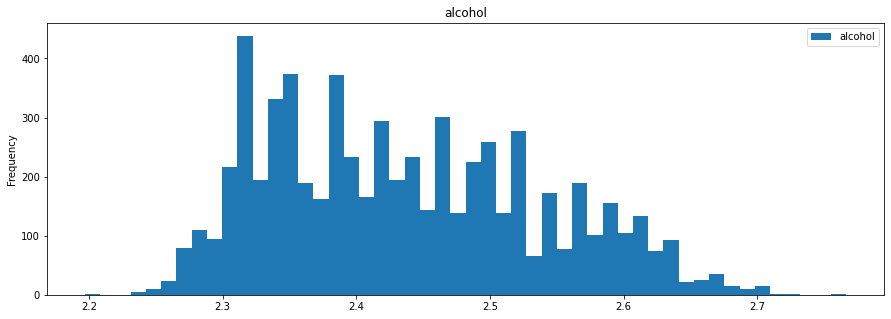

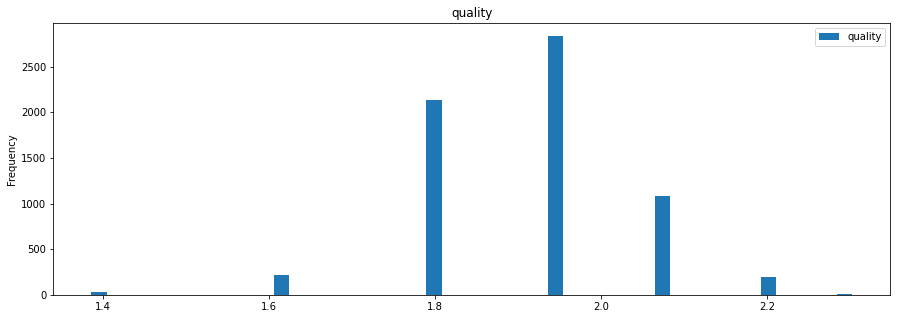

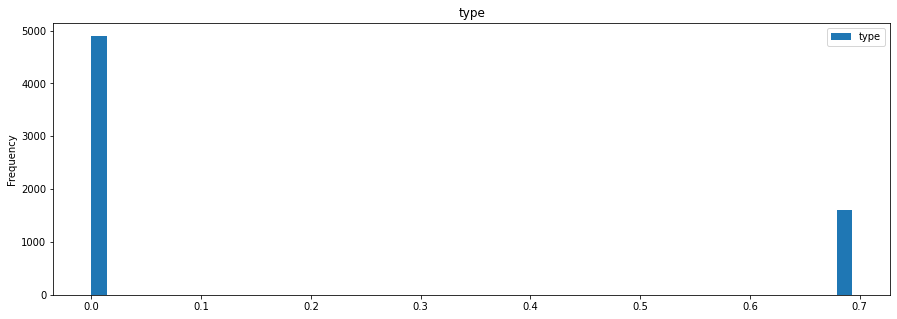

In [5]:
# Histogramas com as distribuições das variáveis'''

# Referência: https://matplotlib.org/gallery/index.html'''

for (column, _ ) in df_wine_normalizado.items():
    plt.figure()
    df_wine_normalizado[column].plot.hist(bins=50, figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

**Podemos analisar uma redução de cauda em algumas distribuições, mas também podemos notar um surgimento de cauda em total sulfur dioxide, que não existe nos dados originais. Característica observada pela transformação logarítmica**

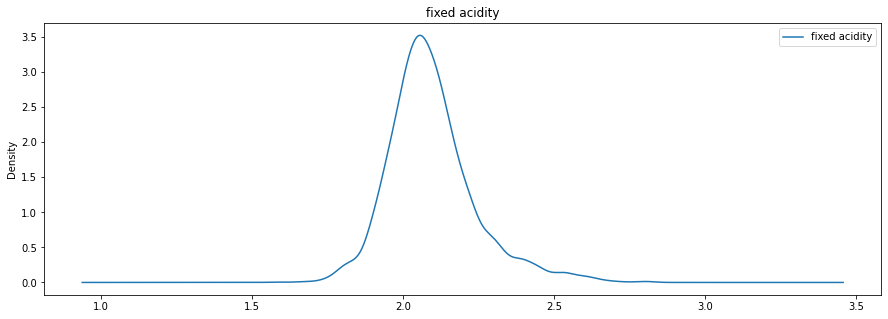

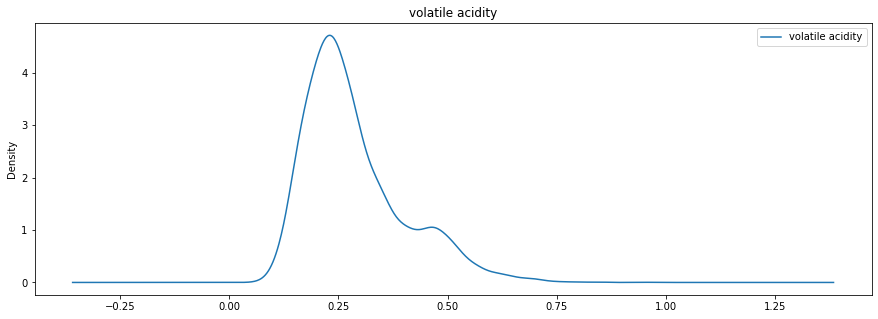

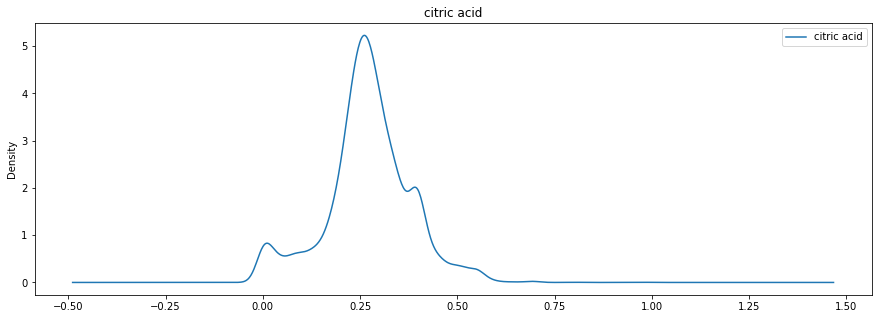

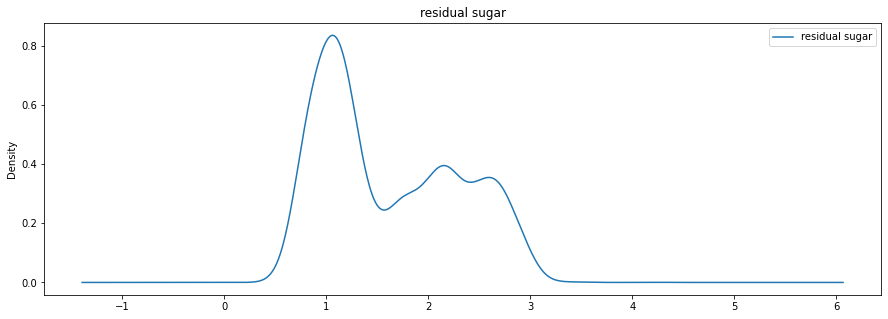

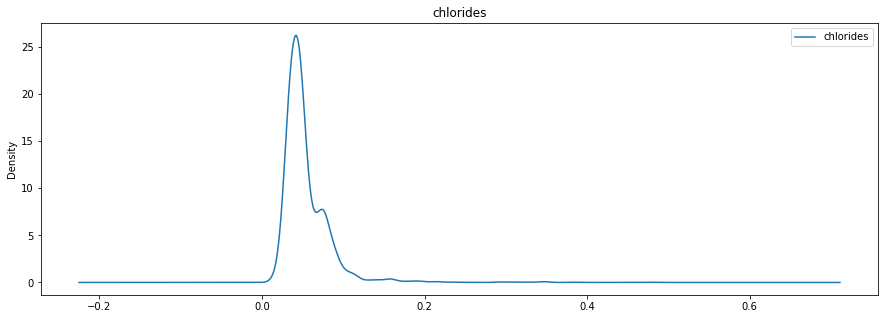

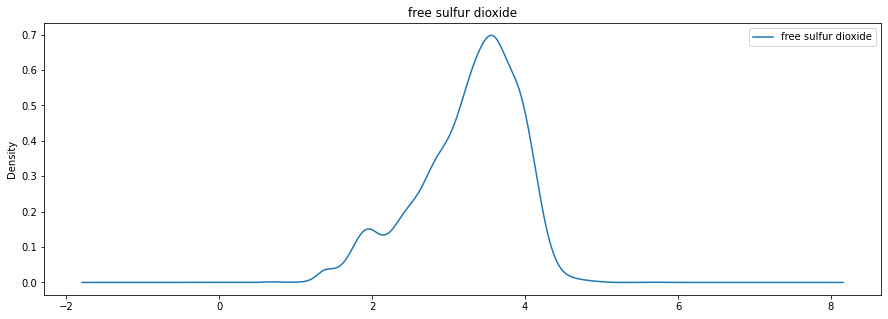

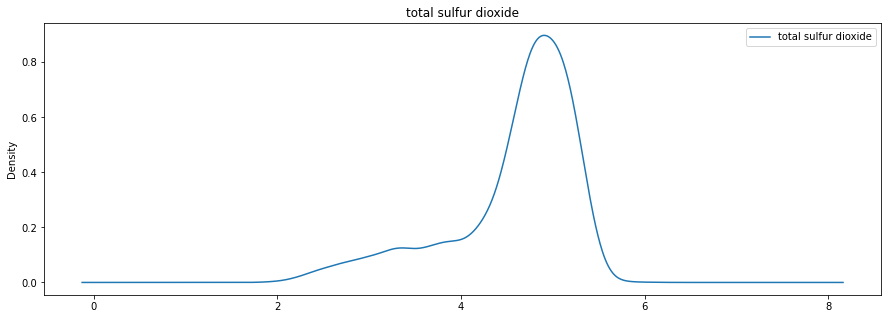

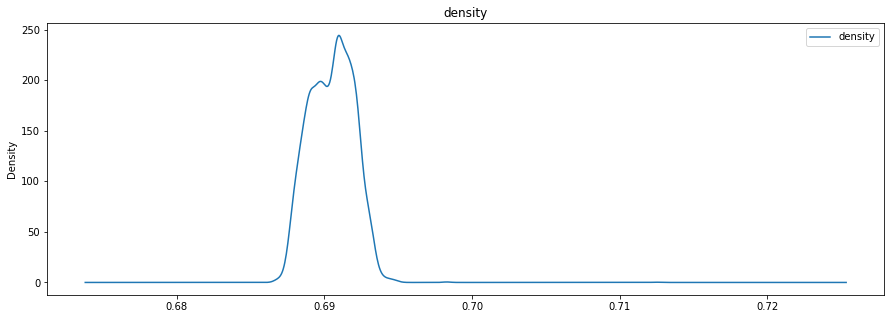

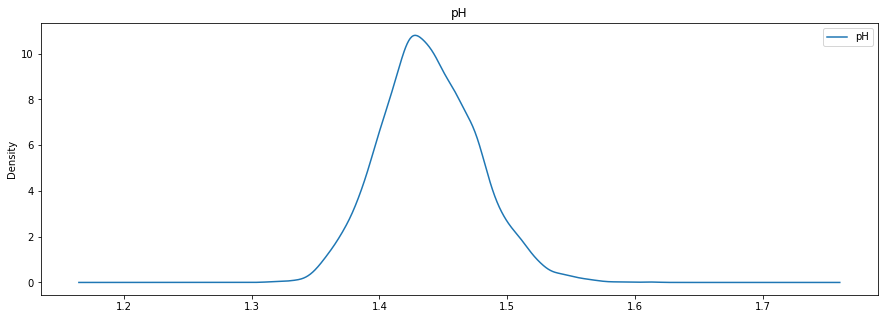

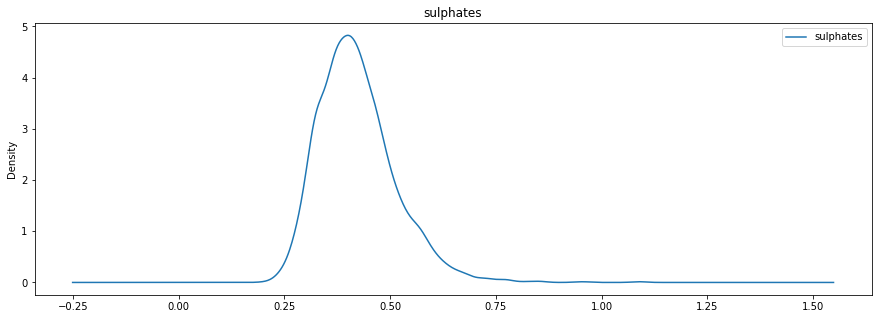

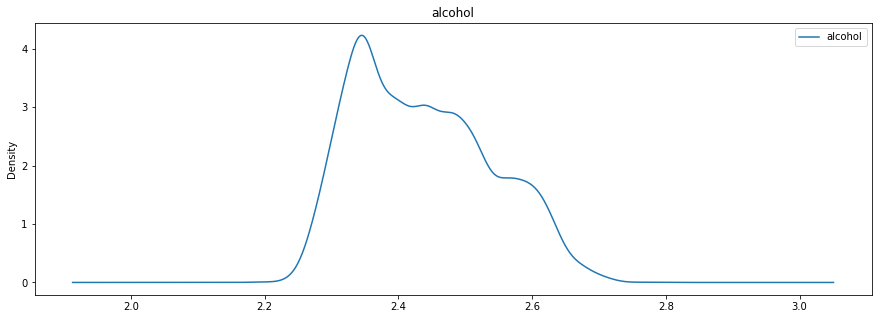

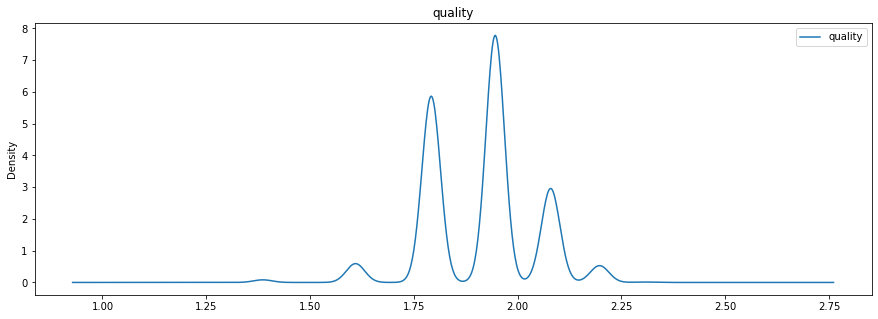

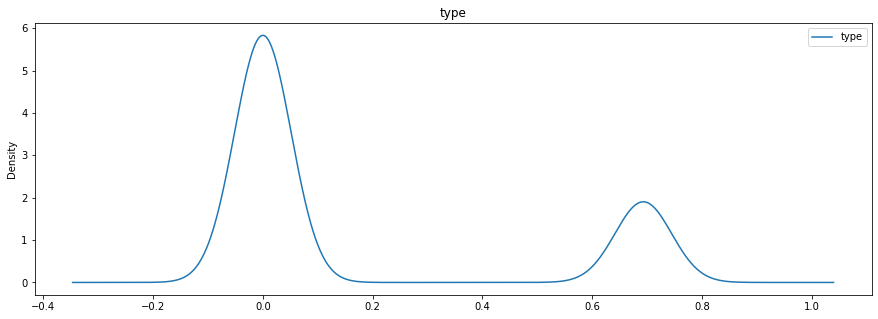

In [6]:
# Utilizar KDE - Kernel Density Estimate

# Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html
for (column, _ ) in df_wine_normalizado.items():
    plt.figure()
    df_wine_normalizado[column].plot.kde(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

**As PDFs se mantiveram quase iguais, menos no caso da total sulfur dioxide que teve o menor pico suavizado, levando a curva a uma proximidade maior de uma normal**

In [17]:
# Correlação entre as variáveis

df_wine_normalizado.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,0.2221,0.3058,-0.0905,0.3147,-0.3324,-0.3787,0.4656,-0.2705,0.2879,-0.1087,-0.0853
volatile acidity,0.2221,1.0000,-0.4082,-0.1702,0.3974,-0.3983,-0.4683,0.2733,0.2531,0.2379,-0.0355,-0.2724
citric acid,0.3058,-0.4082,1.0000,0.1417,0.0046,0.1365,0.2071,0.0784,-0.3420,0.0353,-0.0064,0.1029
residual sugar,-0.0905,-0.1702,0.1417,1.0000,-0.1315,0.4014,0.4303,0.5136,-0.2578,-0.1863,-0.3354,-0.0145
chlorides,0.3147,0.3974,0.0046,-0.1315,1.0000,-0.2594,-0.3490,0.3842,0.0550,0.3836,-0.2693,-0.2061
free sulfur dioxide,-0.3324,-0.3983,0.1365,0.4014,-0.2594,1.0000,0.7810,-0.0491,-0.1465,-0.2269,-0.1455,0.1183
total sulfur dioxide,-0.3787,-0.4683,0.2071,0.4303,-0.3490,0.7810,1.0000,-0.1045,-0.2512,-0.3259,-0.1885,0.0121
density,0.4656,0.2733,0.0784,0.5136,0.3842,-0.0491,-0.1045,1.0000,0.0113,0.2685,-0.6890,-0.2957
pH,-0.2705,0.2531,-0.3420,-0.2578,0.0550,-0.1465,-0.2512,0.0113,1.0000,0.2103,0.1279,0.0173
sulphates,0.2879,0.2379,0.0353,-0.1863,0.3836,-0.2269,-0.3259,0.2685,0.2103,1.0000,-0.0039,0.0393


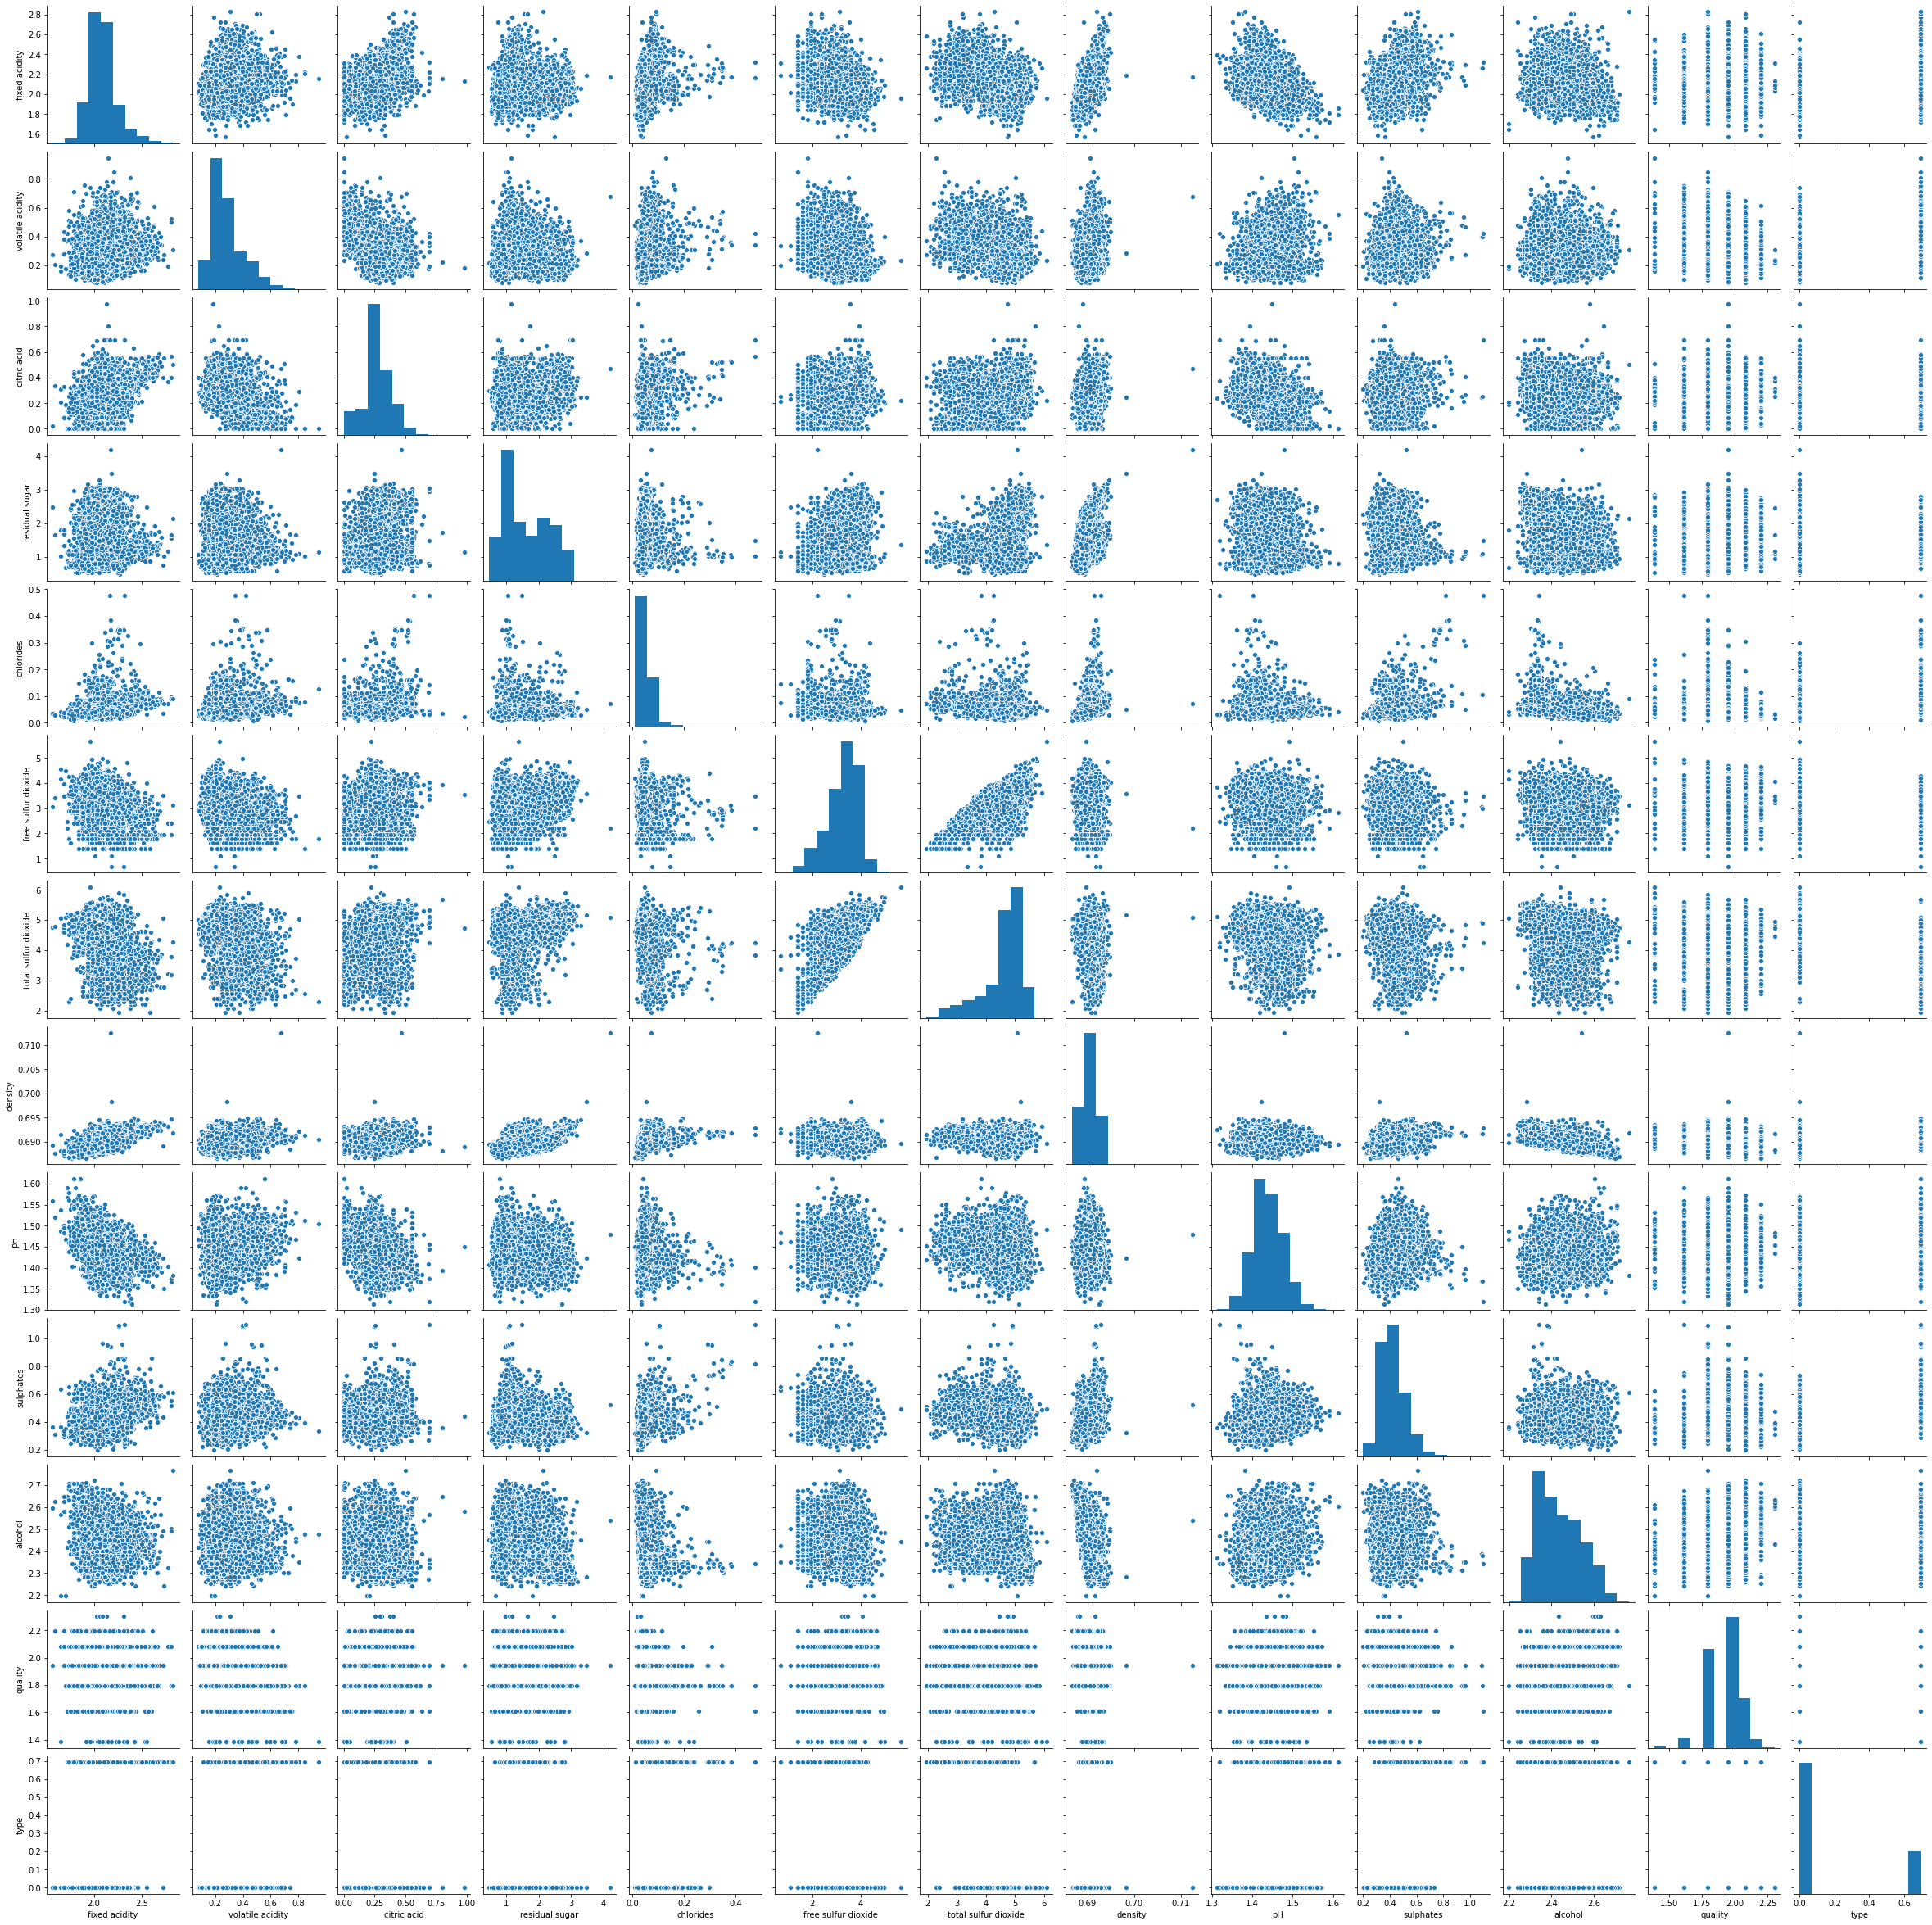

In [7]:
# Scatter Plot

# Referência: https://seaborn.pydata.org/generated/seaborn.pairplot.html

import seaborn as sb
sb.pairplot(df_wine_normalizado)

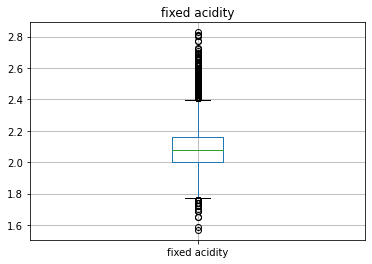

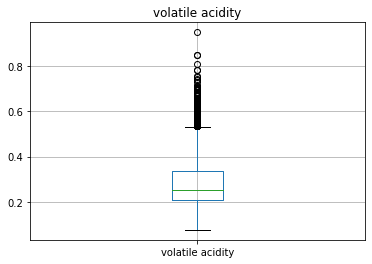

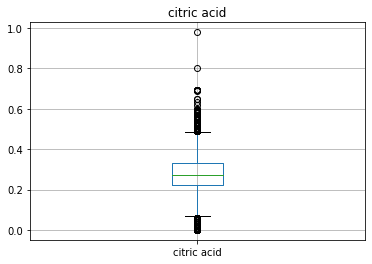

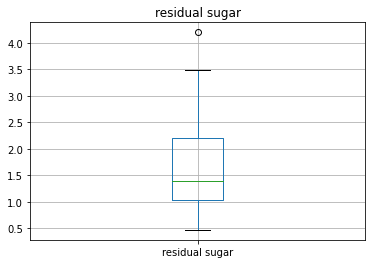

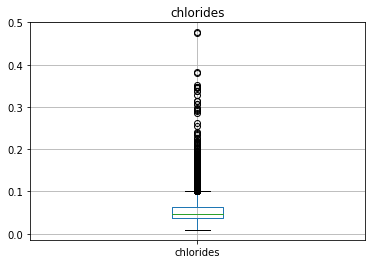

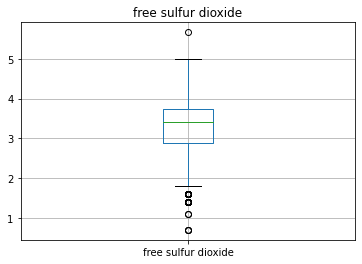

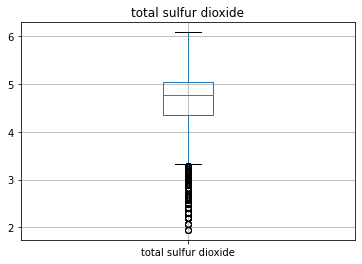

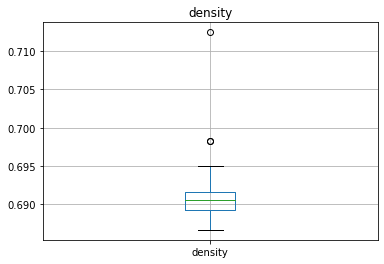

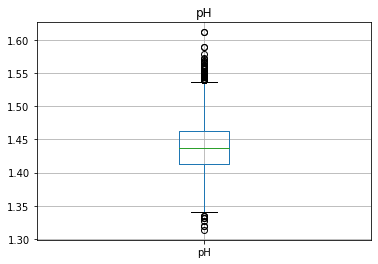

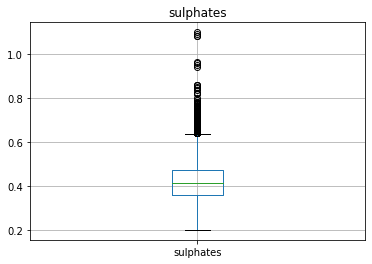

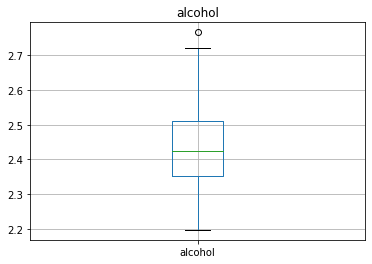

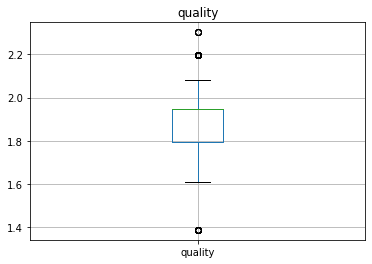

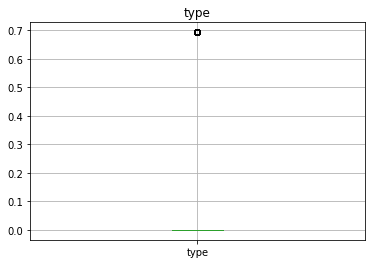

In [9]:
# Box Plot
# Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html'''

for (column_name, _ ) in df_wine_normalizado.items():
    plt.figure()
    df_wine_normalizado.boxplot(column = column_name)
    plt.title(column_name)